### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

Objetivo:

Hacer un EDA del dataset

In [49]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Data Cleaning:

Cambio las categorías a mayúsculas para que me interprete igual todas las que estan escritas diferente

In [52]:
dict_to_change = dict(zip(
    df['Additional_Info'].unique(),
    pd.Series(df['Additional_Info'].unique()).apply(lambda x: x.upper())
))

df['Additional_Info'] = df['Additional_Info'].apply(lambda x: dict_to_change[x])

df['Additional_Info'].unique()

array(['NO INFO', 'IN-FLIGHT MEAL NOT INCLUDED',
       'NO CHECK-IN BAGGAGE INCLUDED', '1 SHORT LAYOVER',
       '1 LONG LAYOVER', 'CHANGE AIRPORTS', 'BUSINESS CLASS',
       'RED-EYE FLIGHT', '2 LONG LAYOVER'], dtype=object)

Cambiamos los formatos a los formatos correctos:

In [53]:
df["Arrival_Time"] = df["Arrival_Time"].str[:5]
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y")

df.loc[df["Total_Stops"].notna(),"Total_Stops"] = df.loc[df["Total_Stops"].notna(),"Total_Stops"].str[0].replace('n','0')
df["Total_Stops"] = df["Total_Stops"].astype('Int64')

In [54]:
#  Paso a minutos la duración:
# Suponé que tu columna se llama 'Duration'
df["Duration_Minutes"] = df["Duration"].apply(lambda x: 
    int(x.split('h')[0].strip()) * 60 + int(x.split('h')[1].replace('m', '').strip()) 
    if 'h' in x and 'm' in x else
    int(x.replace('m', '').strip()) if 'm' in x else
    int(x.replace('h', '').strip()) * 60
)
df = df.drop("Duration", axis = 1)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10683 non-null  object        
 1   Date_of_Journey   10683 non-null  datetime64[ns]
 2   Source            10683 non-null  object        
 3   Destination       10683 non-null  object        
 4   Route             10682 non-null  object        
 5   Dep_Time          10683 non-null  object        
 6   Arrival_Time      10683 non-null  object        
 7   Total_Stops       10682 non-null  Int64         
 8   Additional_Info   10683 non-null  object        
 9   Price             10683 non-null  int64         
 10  Duration_Minutes  10683 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), int64(2), object(7)
memory usage: 928.6+ KB


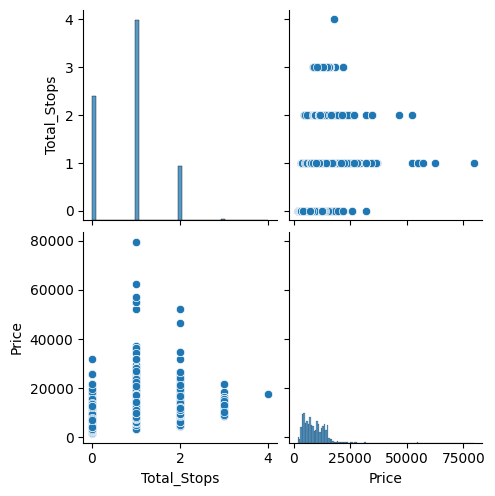

In [18]:
# Create the pairplot
sns.pairplot(df)

In [27]:
categorical_columns = df.select_dtypes(include='object').drop( ['Source', 'Destination', 'Route','Dep_Time', 'Arrival_Time', 'Duration'], axis = 1).columns  # or manually define
target = "Price"

In [9]:
# for col in categorical_columns:
#     plt.figure(figsize=(10, 5))
#     sns.histplot(data=df, x=target, hue=col, multiple="stack")  # or "dodge", "layer"
#     plt.title(f"Price distribution by {col}")
#     plt.show()

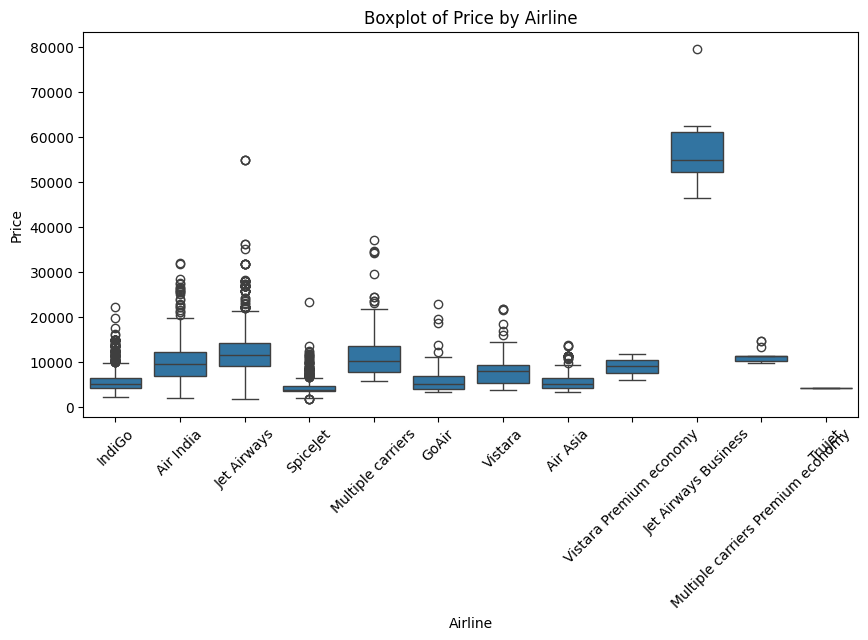

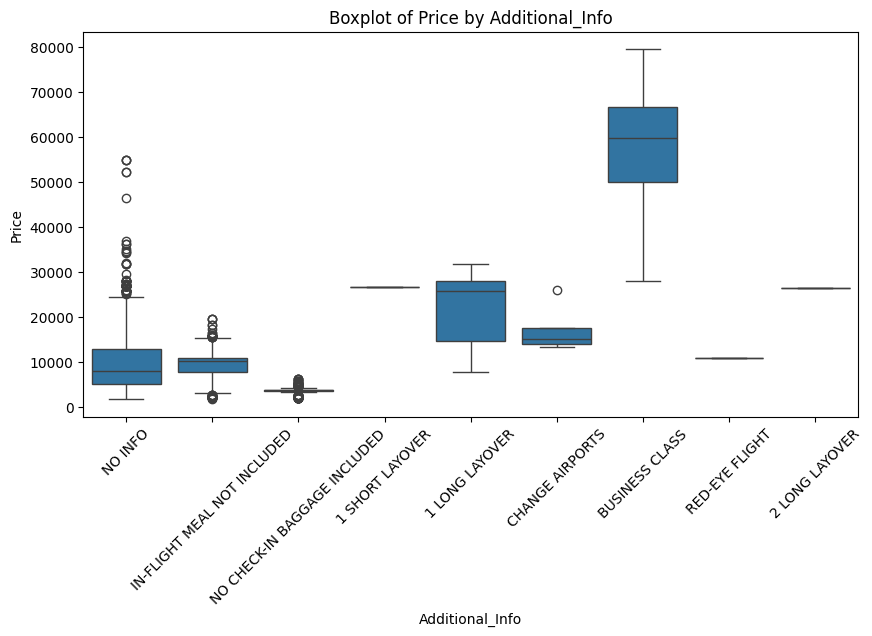

In [28]:
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y=target)
    plt.title(f"Boxplot of Price by {col}")
    plt.xticks(rotation=45)
    plt.show()

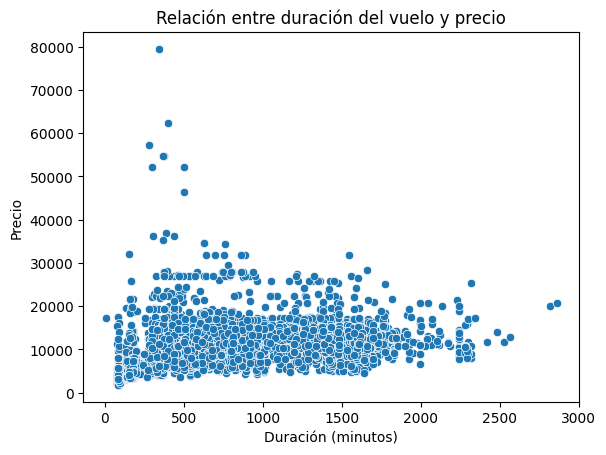

In [56]:
sns.scatterplot(data=df, x="Duration_Minutes", y="Price")
plt.title("Relación entre duración del vuelo y precio")
plt.xlabel("Duración (minutos)")
plt.ylabel("Precio")
plt.show()

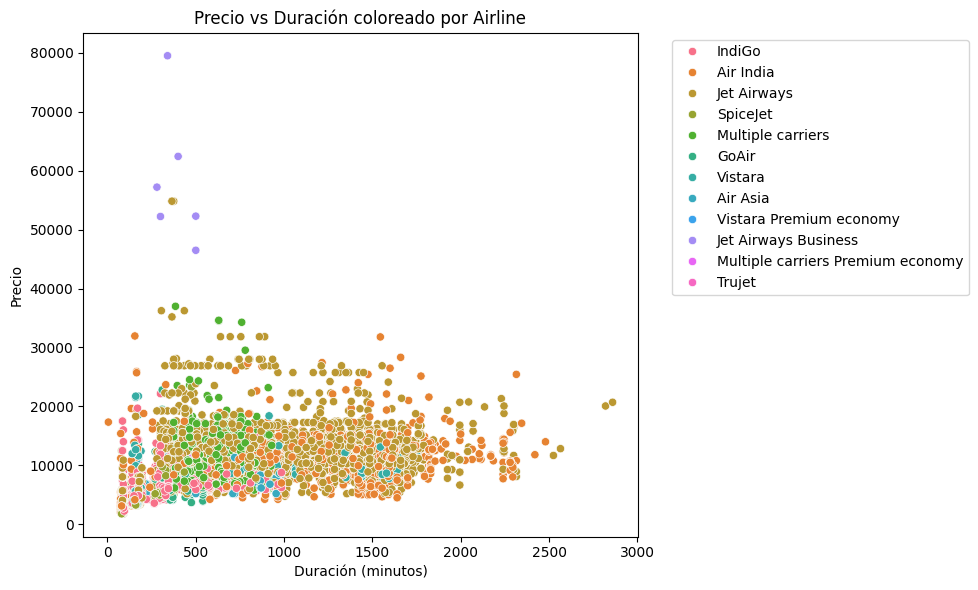

In [57]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Duration_Minutes", y="Price", hue="Airline")
plt.title("Precio vs Duración coloreado por Airline")
plt.xlabel("Duración (minutos)")
plt.ylabel("Precio")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

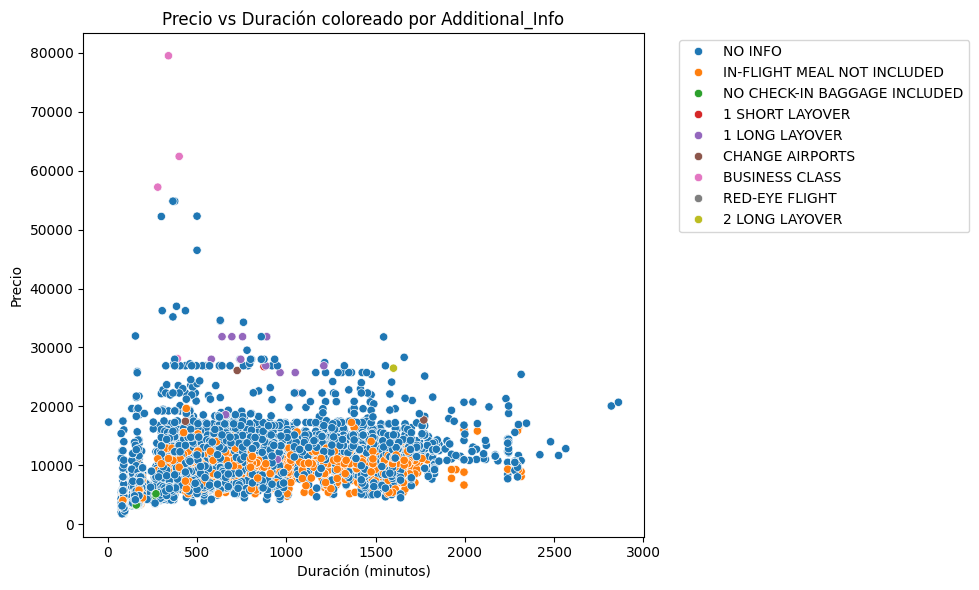

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Duration_Minutes", y="Price", hue="Additional_Info")
plt.title("Precio vs Duración coloreado por Additional_Info")
plt.xlabel("Duración (minutos)")
plt.ylabel("Precio")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

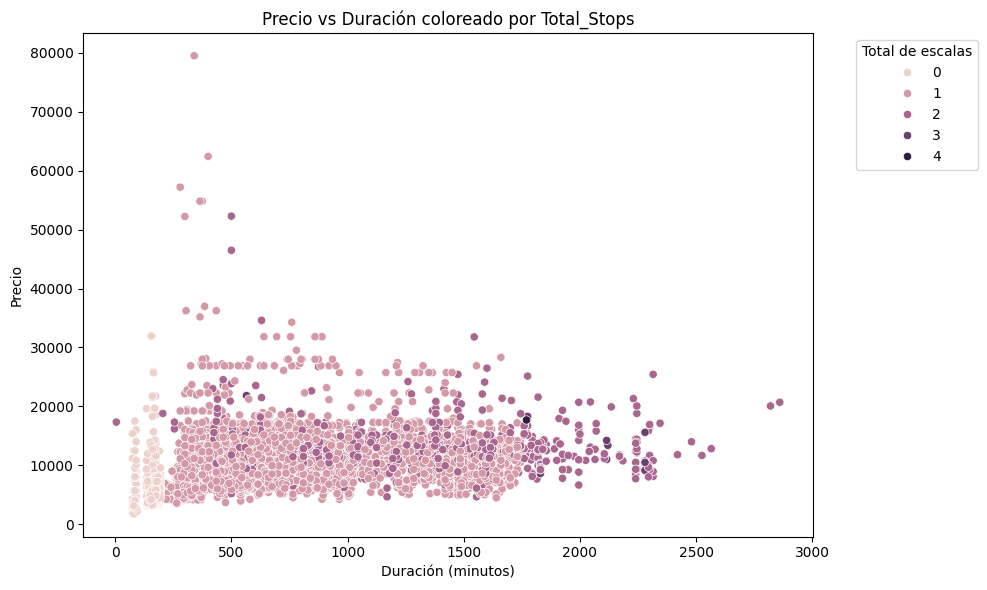

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Duration_Minutes", y="Price", hue="Total_Stops")
plt.title("Precio vs Duración coloreado por Total_Stops")
plt.xlabel("Duración (minutos)")
plt.ylabel("Precio")
plt.legend(title="Total de escalas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()